<a href="https://colab.research.google.com/github/Panchol211/Week9_IP_KNN_NB/blob/main/week9_IP_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

This analysis aims to develop a prediction model to determine whether or not a passenger would survive or would not survive the accident

# Metric of Success

*   Randomly partition each dataset into two parts i.e 80 - 20 sets.
*   For dataset 1, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.
*   For dataset 2, perform classification of the testing set samples using the Naive Bayes Classifier.
*   Compute the accuracy (percentage of correct classification).
Report the confusion matrix of each classifier.
Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of the modeling.



NB/ The project will be considered a success when we are able to develop a reliable prediction model that has a high accuracy level. We shall make sure the model doesn't suffer from any instances of overfitting or underfitting






# Understanding the Context

This analysis aims to use given data to come up with a model that can predict whether a passenger survived or not. Some of the features that will be trained in this model include the gender and age of the passenger and the cabin where they were located. The analysis uses a K-Nearest Neighbors Classifier to build the prediction model

# Recording the Experimental Design

The following are the steps that will be used in this analysis in order to respond to the research question amicably

Load data and preview preliminary characteristics

Data Cleaning

EDA

Implementing the Solution

Finding and recomendations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics.pairwise import cosine_similarity
import heapq
from collections import Counter

In [2]:
# Reading the data from the csv file

data = pd.read_csv('train.csv',index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Checking the data 

In [3]:
# Checking the top 5 records

data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking the last 5 records

data.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Confirming number of records and columns

data.shape

(891, 11)

In [6]:
# Checking the attributes data type

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
# Checking number of unique variables for each column

data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

# DATA UNDERSTANDING

PassengerId - is in int64 form and it is used to describe the passengers index.

Survived -this is our target variable as we are trying to predict who survived.

Pclass -this is used to determine the ticket class

Sex - this is used to show the gender of the victims

Age - this shows the age of the victims

SibSp -  this shows the siblings involved in the incident

Parch -  this shows of parents / children aboard the Titanic

Ticket -  Ticket number

Fare -Fare paid by the passengers 

Embarked -Port of where the people got onto the ship

ACTIONS

Convert object to Numeric data types.

Round off age to whole numbers

Delete duplicated rows

Outliers : Impute age median and leave the other outliers

# Data Cleaning

In [8]:
# Checking for duplicates

data.duplicated().any()

False


*  No duplicate records in the dataset






In [9]:
# Check for missing data

data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64



*   77% of the cabin data is missing , therefore, we shall drop this column 




In [10]:
# Dropping the Cabin attribute since it has only 204 records available

data = data.drop(columns=['Cabin'])

In [11]:
# Drop remaining null values

data = data.dropna()

In [12]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [13]:
# Checking the shape of the new dataset

data.shape

(712, 10)

In [14]:
# Dropping name column

data = data.drop(columns=['Name'])

data.sample(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
792,0,2,male,16.0,0,0,239865,26.0000,S
619,1,2,female,4.0,2,1,230136,39.0000,S
374,0,1,male,22.0,0,0,PC 17760,135.6333,C
64,0,3,male,4.0,3,2,347088,27.9000,S
248,1,2,female,24.0,0,2,250649,14.5000,S


The names of the passengers didnot have any effect on the analysis of the data so, I deleted them

# Checking for Outliers

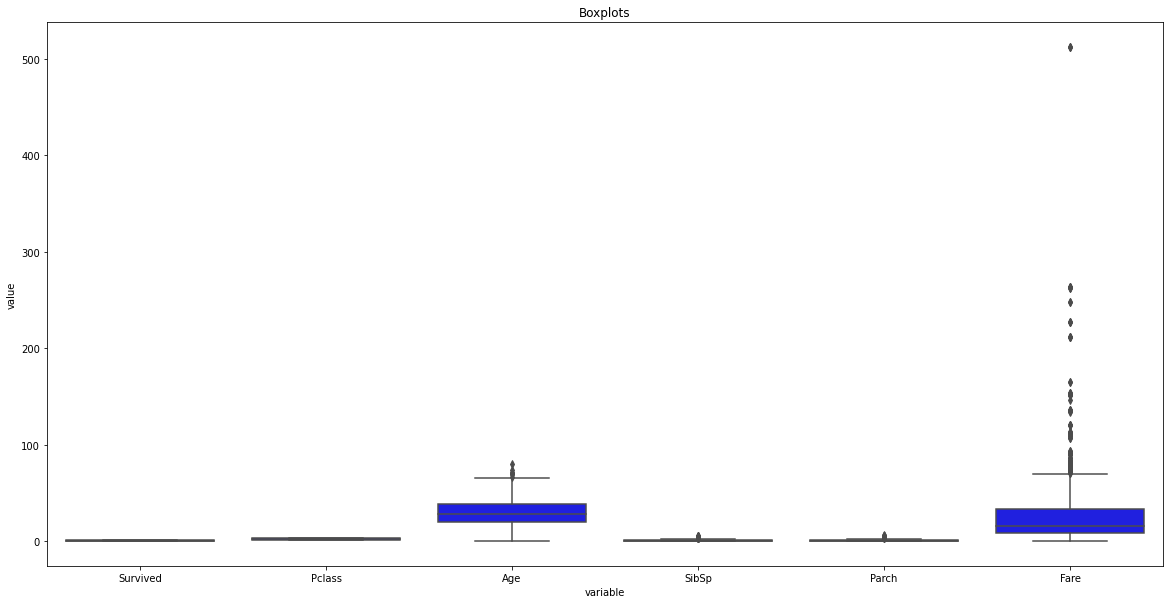

In [15]:
# Using boxplots to check for outliers

boxplot = pd.DataFrame(data = data, columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

plt.figure(figsize=(20,10))

sns.boxplot(x='variable', y='value', data=pd.melt(boxplot), color = 'blue').set_title('Boxplots')

plt.show()



*   The age and fare columns have outliers. We will keep these records in the analysis but perform feature scaling later for modeling



# Exploratory Data Analysis

# Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SibSp Distribution')

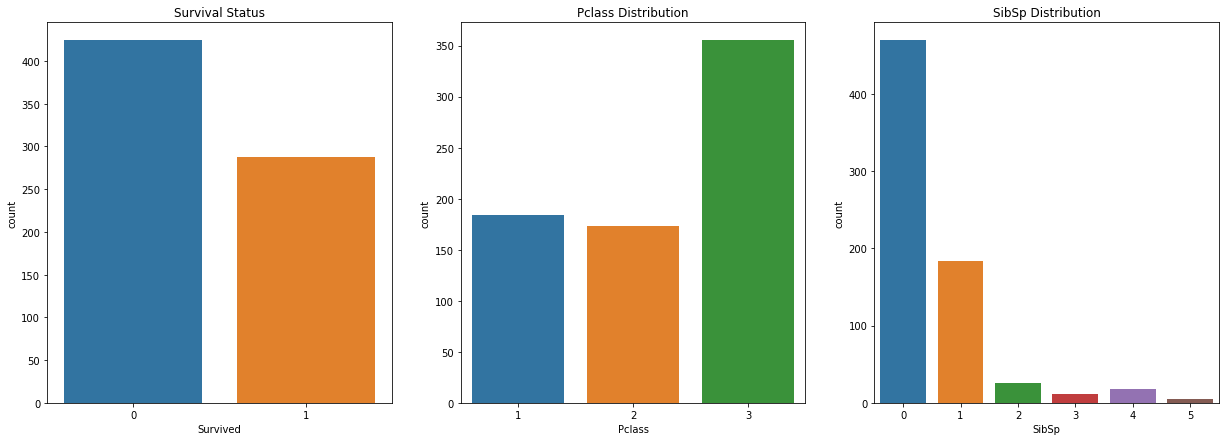

In [16]:
# plotting bar charts to check distributions

fig,ax=plt.subplots(1,3,figsize=(21,7))
sns.countplot('Survived',data= data,ax=ax[0])
ax[0].set_title('Survival Status')
sns.countplot('Pclass',data=data,ax=ax[1])
ax[1].set_title('Pclass Distribution')
sns.countplot('SibSp',data=data,ax=ax[2])
ax[2].set_title('SibSp Distribution')

More people didn't survied the accident. Also, most passengers were in the third"Pclass" while the most popular SibSp was 0.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Embarked Distribution')

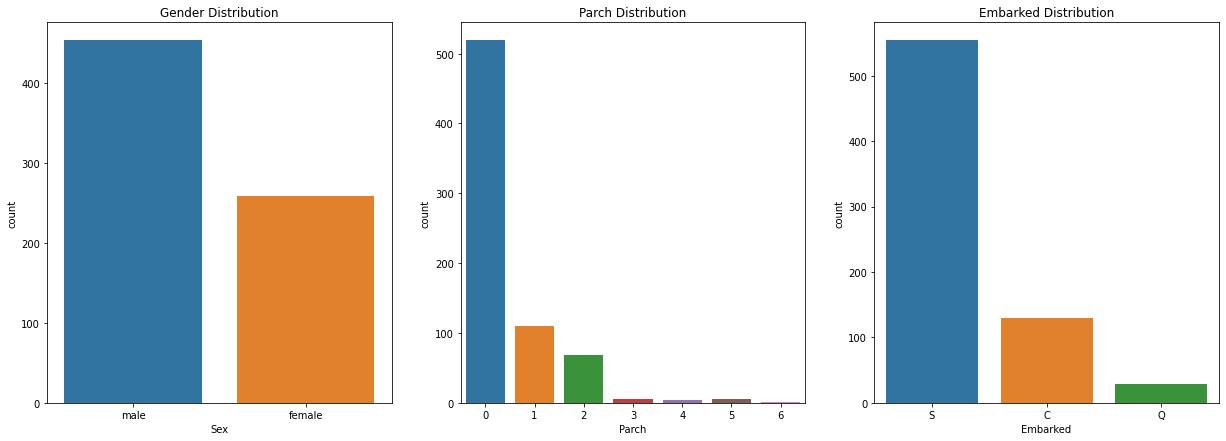

In [17]:
# more bar charts

fig,ax=plt.subplots(1,3,figsize=(21,7))
sns.countplot('Sex',data=data,ax=ax[0])
ax[0].set_title('Gender Distribution')
sns.countplot('Parch',data=data,ax=ax[1])
ax[1].set_title('Parch Distribution')
sns.countplot('Embarked',data=data,ax=ax[2])
ax[2].set_title('Embarked Distribution')

Most passengers on the ship were males and most of boarded from Southampton

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

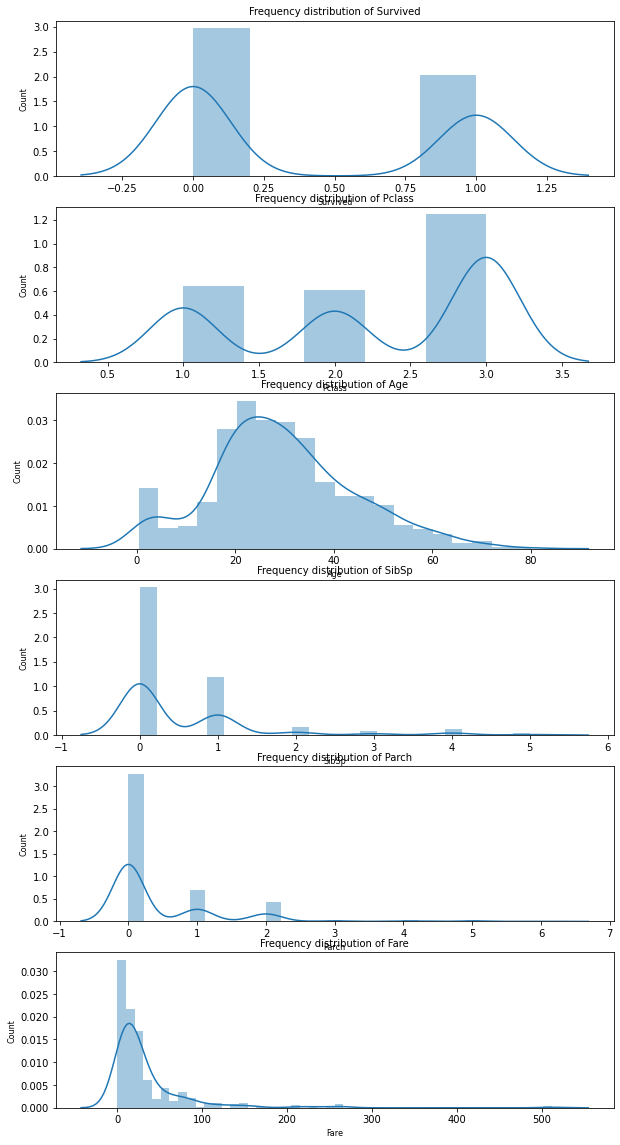

In [18]:
# Frequency distribution plots

col_names = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

The fare variable has a right skew, with most passengers paying fares between 0 and 50.

The age variable has a normal distribution

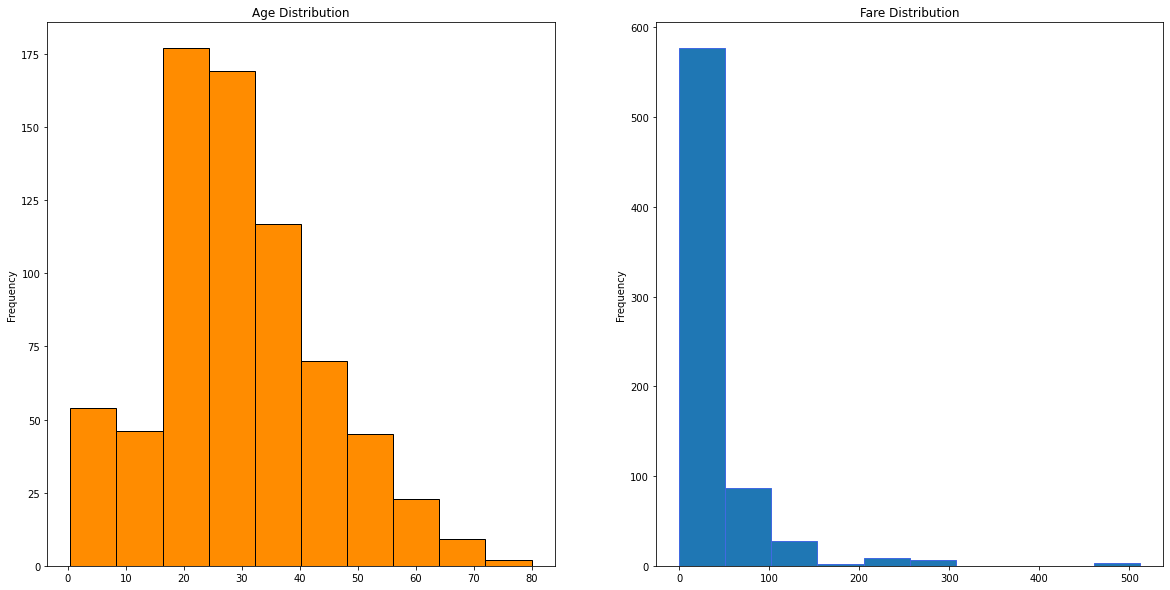

In [19]:
# histograms to show distribution of age and fare

fig, ax=plt.subplots(1,2, figsize=(20,10))
data['Age'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='darkorange')
ax[0].set_title('Age Distribution')

data['Fare'].plot.hist(ax=ax[1], bins=10, edgecolor='royalblue')
ax[1].set_title('Fare Distribution')


plt.show()

# Measures of Central Tendency

In [20]:
# mean, mode and median ages

print('Mean age is ' + str(data.Age.mean()))
print('Median age is ' + str(data.Age.median()))
print('Mode age is ' + str(data.Age.mode()))

Mean age is 29.64209269662921
Median age is 28.0
Mode age is 0    24.0
dtype: float64


In [21]:
# mean, mode and median fares

print('Mean fare is ' + str(data.Fare.mean()))
print('Median fare is ' + str(data.Fare.median()))
print('Mode fare is ' + str(data.Fare.mode()))

Mean fare is 34.56725140449432
Median fare is 15.64585
Mode fare is 0    13.0
dtype: float64


In [22]:
# summary statistics of numeric variables

data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


# Bivariate Analysis

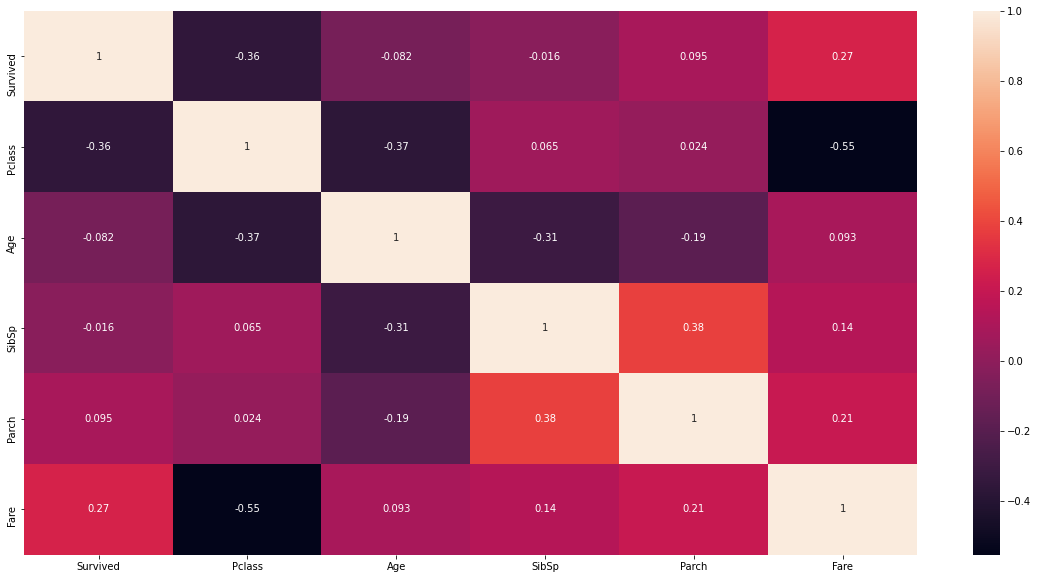

In [23]:
# Plotting the Pearson correlation coefficients

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

The attributes SibSp and Parch have a relatively weak positive correlation. On the other hand, fare and Pclass have a strong negative correlation.

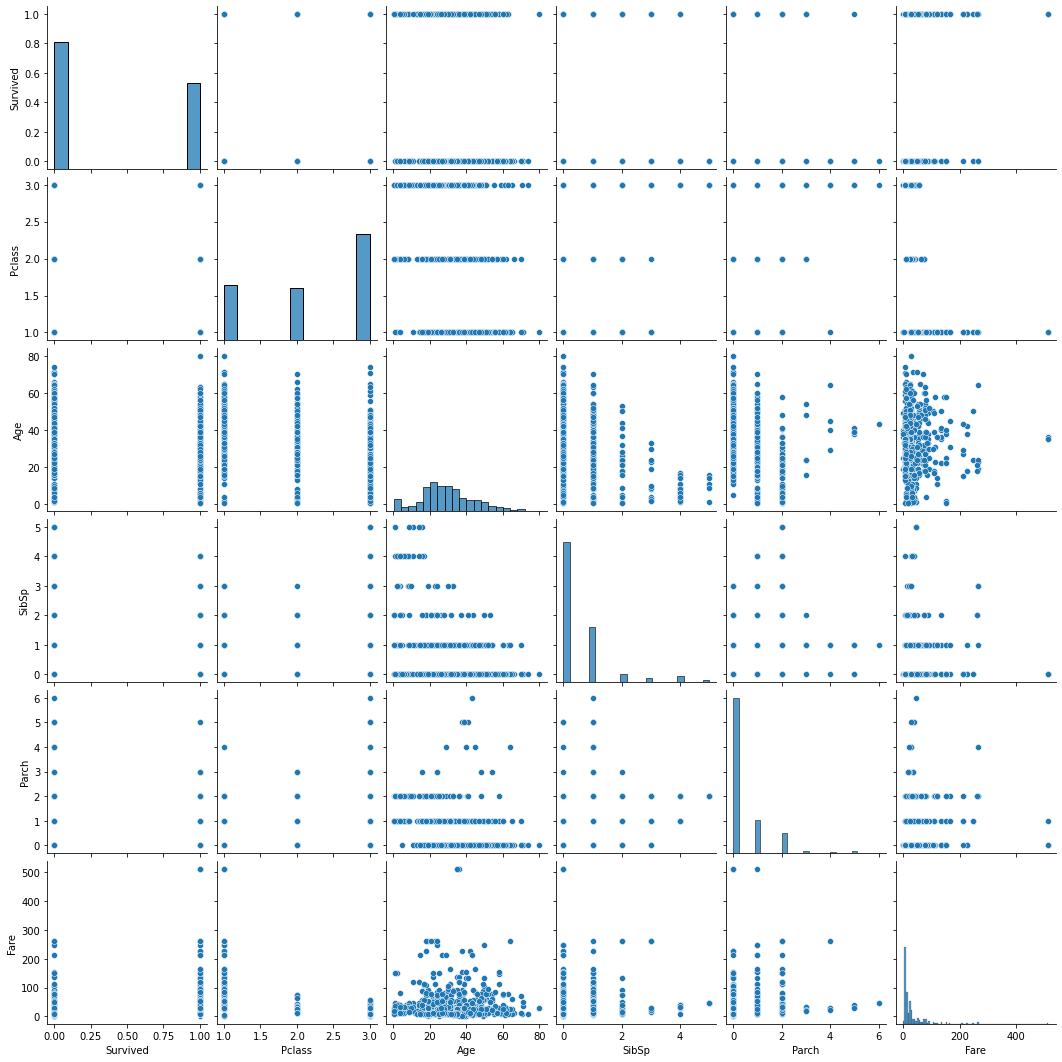

In [36]:
# Ploting the bivariate summaries

sns.pairplot(data)
plt.show()

In [24]:
# Creating age groups

conditions = [
    (data['Age'] >= 0) & (data['Age'] <= 10),
    (data['Age'] >= 11) & (data['Age'] <= 20),
    (data['Age'] >= 21) & (data['Age'] <= 30),
    (data['Age'] >= 31) & (data['Age'] <= 40),
    (data['Age'] >= 41) & (data['Age'] <= 50),
    (data['Age'] >= 51) & (data['Age'] <= 60),
    (data['Age'] >= 61) & (data['Age'] <= 100)]

# create a list of the values we want to assign for each condition
values = ['Below 10', '11-20', '21-30', '31-40', '41-50', '51-60', 'Above 60']

# create a new column and use np.select to assign values to it using our lists as arguments
data['age_group'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,21-30
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,31-40
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30
4,1,1,female,35.0,1,0,113803,53.1000,S,31-40
5,0,3,male,35.0,0,0,373450,8.0500,S,31-40


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


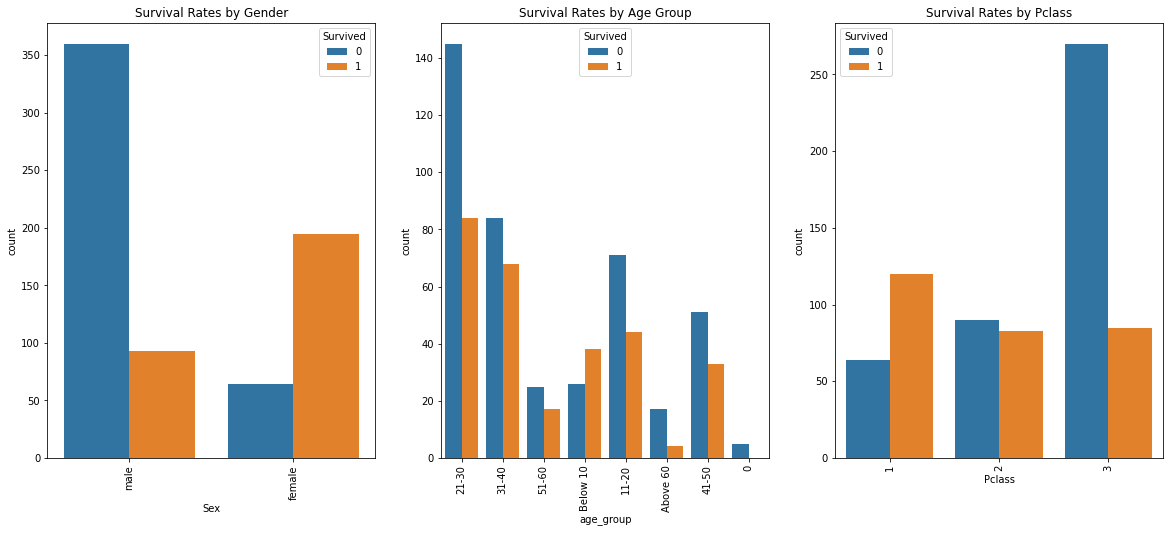

In [25]:
# Comparing survival rate with gender, age group and Pclass

fig,ax=plt.subplots(1,3,figsize=(20,8))

sns.countplot('Sex',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('Survival Rates by Gender')


sns.countplot('age_group',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survival Rates by Age Group')


sns.countplot('Pclass',hue='Survived',data=data,ax=ax[2])
ax[2].set_title('Survival Rates by Pclass')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()



*   More females survived the males
*   Mojority of casualities was highest in age group 21-30.
*   Most casualities were also in Pclass, which third class

# Implementing the Solution

# Feature Engineering

In [26]:
# Dropping unnecessary columns

data1 = data.drop(columns=['age_group'])
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,382652,29.1250,Q
887,0,2,male,27.0,0,0,211536,13.0000,S
888,1,1,female,19.0,0,0,112053,30.0000,S


In [27]:
# encoding categorical variables

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()

data1['Sex'] = le.fit_transform(data1['Sex'])
data1['Ticket'] = le.fit_transform(data1['Ticket'])
data1['Embarked'] = le.fit_transform(data1['Embarked'])

data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,407,7.2500,2
2,1,1,0,38.0,1,0,470,71.2833,0
3,1,3,0,26.0,0,0,531,7.9250,2
4,1,1,0,35.0,1,0,39,53.1000,2
5,0,3,1,35.0,0,0,372,8.0500,2


# KNN Classifier

# 80 - 20 Split of the data

In [28]:
# Defining the features and target variable

my_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']

# features
X = data1[my_cols].values

# target variable
y = data1['Survived'].values

In [29]:
# Defining the training and tests sets with an 80 - 20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Training the model

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
# Making predictions

y_pred1 = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

    Actual  Predicted
37       1          1
11       1          0
22       1          1
91       0          0
60       0          0
           Actual   Predicted
count  143.000000  143.000000
mean     0.426573    0.377622
std      0.496318    0.486496
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [33]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[72 10]
 [17 44]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        82
           1       0.81      0.72      0.77        61

    accuracy                           0.81       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.81      0.81      0.81       143



The model has an accuracy score of 81%. The correct number of predictions are 72 true positives and 44 false negatives while the number of incorrect predictions are 10 false positives and 17 false negatives

# 70 - 30 Split of the data

In [34]:
# Defining the training and tests sets with 70-30 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Training the model

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
# Making predictions

y_pred2 = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
186       0          0
188       0          1
10        1          1
137       0          0
4         0          0
           Actual   Predicted
count  214.000000  214.000000
mean     0.415888    0.397196
std      0.494030    0.490465
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [38]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[101  24]
 [ 28  61]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       125
           1       0.72      0.69      0.70        89

    accuracy                           0.76       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.76      0.76       214



When a 70-30 split of the data is applied, the model has an accuracy score of 76%. The correct number of predictions are 101 true positives and 61 false negatives while the number of incorrect predictions are 24 false positives and 28 false negatives

# 60 - 40 Split of the data

In [39]:
# Defining the training and tests sets with 60-40 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [40]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Training the model

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
# Making predictions

y_pred3 = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred3.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
128       0          1
180       0          0
191       0          1
199       1          1
84        1          1
           Actual   Predicted
count  285.000000  285.000000
mean     0.407018    0.407018
std      0.492142    0.492142
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [43]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[140  29]
 [ 29  87]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       169
           1       0.75      0.75      0.75       116

    accuracy                           0.80       285
   macro avg       0.79      0.79      0.79       285
weighted avg       0.80      0.80      0.80       285



When a 60-40 training and test sets split, the model has an accuracy score of 80%. The correct number of predictions are 140 true positives and 87 false negatives while the number of incorrect predictions are 29 false positives and 29 false negatives.
The model with 80 - 20 split of the dataset performs best with an f1- score accuracy of 81%.

# Model Optimization

# LDA




Performing dimensionality reduction with Linear Discriminant Analysis (LDA)

In [44]:
# Defining the training and tests sets with an 80 - 20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Peforming LDA

lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [46]:
# Training and Making Predictions

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

    Actual  Predicted
20       0          0
47       0          0
9        0          1
24       0          1
48       0          0
           Actual   Predicted
count  143.000000  143.000000
mean     0.426573    0.328671
std      0.496318    0.471381
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [47]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[75  7]
 [21 40]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        82
           1       0.85      0.66      0.74        61

    accuracy                           0.80       143
   macro avg       0.82      0.79      0.79       143
weighted avg       0.81      0.80      0.80       143

Accuracy: 0.8041958041958042


After applying two features to LDA, the model accuracy does not improve much, it actually goes down

In [48]:
# Using 4 components of LDA

lda = LDA(n_components=4)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training and Making Predictions

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[75  7]
 [21 40]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        82
           1       0.85      0.66      0.74        61

    accuracy                           0.80       143
   macro avg       0.82      0.79      0.79       143
weighted avg       0.81      0.80      0.80       143

Accuracy: 0.8041958041958042


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Adding more features for example 4 features, the model did poorly, this means that the LDA didnot help in improving the model.

# Cosine Similarity




Using cosine similarity as a distance metric to optimize the model

In [49]:
# Defining cosine similarity function

def cos_knn(k, X_test, y_test, X_train, y_train):
    
    # find similarity for every point in test data between every other point in the train data
    cosim = cosine_similarity(X_test, X_train)

    # get indices of records in the train data that are most similar to any given test data point
    top = [(heapq.nlargest((k+1), range(len(i)), i.take)) for i in cosim]

    # convert indices to numbers
    top = [[y_train[j] for j in i[:k]] for i in top]

     # vote, and return prediction for every record in test data
    pred = [max(set(i), key=i.count) for i in top]
    pred = np.array(pred)
    
    # print table giving classifier accuracy using target variable in the test data
    print(classification_report(y_test, pred))   
    

In [50]:
# Checking model accuracy for a 80-20 dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Checking the model accuracy
cos_knn(5, X_test, y_test, X_train, y_train)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        82
           1       0.78      0.69      0.73        61

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



In [51]:
# Checking model accuracy for a 70-30 dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Checking the model accuracy
cos_knn(5, X_test, y_test, X_train, y_train)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       125
           1       0.69      0.67      0.68        89

    accuracy                           0.74       214
   macro avg       0.73      0.73      0.73       214
weighted avg       0.74      0.74      0.74       214



In [52]:
# Checking model accuracy for a 60-40 dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Checking the model accuracy
cos_knn(5, X_test, y_test, X_train, y_train)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       169
           1       0.71      0.72      0.72       116

    accuracy                           0.77       285
   macro avg       0.76      0.76      0.76       285
weighted avg       0.77      0.77      0.77       285



The cosine similarity distance metric has not improved the baseline model any further, therefore the two common optimization method did not help in improving the KNN model. 

#Finding
Given the current dataset size, KNN classifier with a K value of 5 and a training-test split of 80-20 provides a relatively high accuracy classification. LDA and cosine similarity distance metric do not improve the model's accuracy.



**Following insights where seen from the data**:

Male were many compared to females

More females survived than males

The average age of passengers was ranging 20-25 hence most were youth

The first class people paid expensivly compared to the rest and most of them survived ... this could be due the fact that most of the people in first class were grown up and could make decision without panicking during the accident 



# Recomendation 

For further optimization, other distance metrics such as Euclidean and Minkowski distance metrics can be explored. In addition, different values of K can be used to check for optimal model performance.